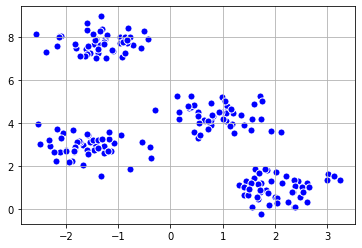

In [3]:
#K-均值聚类

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[:,0], X[:,1], c='blue', marker='o', edgecolors='white', s=50)
plt.grid()
plt.show()

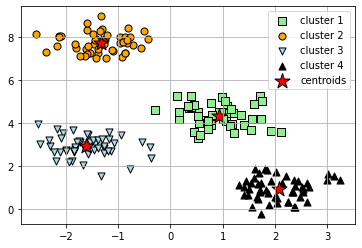

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolors='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolors='black', label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='black', marker='^', edgecolors='black', label='cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

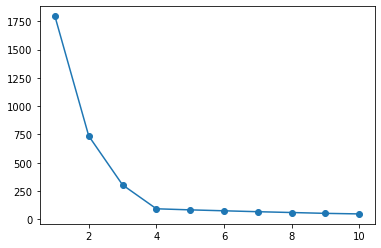

In [5]:
#用肘法识别最佳聚类数K
dis = []
for i in range(1,11):
    km = KMeans(n_clusters=i, n_init=10, init='k-means++', max_iter=300, random_state=0)
    km.fit(X)
    dis.append(km.inertia_)

plt.plot(range(1,11), dis, marker='o')
plt.show()

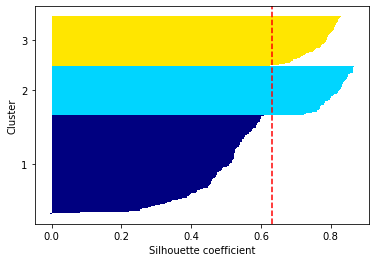

In [6]:
#绘制K=3的聚类轮廓系数图
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=300, tol=0.0001, random_state=0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.show()

In [7]:
 #层次聚类
 from scipy.spatial.distance import pdist,squareform
 import pandas as pd
 np.random.seed(123)
 variables = ['X', 'Y', 'Z']
 labels = ['id0', 'id1', 'id2', 'id3', 'id4']
 X = np.random.random_sample([5,3])*10
 df = pd.DataFrame(X, columns=variables, index=labels)

 row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
 print(row_dist)

id0       id1       id2       id3       id4
id0  0.000000  4.973534  5.516653  5.899885  3.835396
id1  4.973534  0.000000  4.347073  5.104311  6.698233
id2  5.516653  4.347073  0.000000  7.244262  8.316594
id3  5.899885  5.104311  7.244262  0.000000  4.382864
id4  3.835396  6.698233  8.316594  4.382864  0.000000


In [8]:
from scipy.cluster.hierarchy import linkage
#计算连接矩阵
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


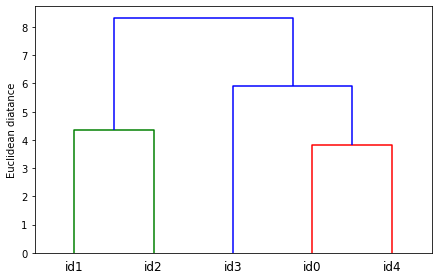

In [9]:
#用树状图显示结果

from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean diatance')
plt.show()

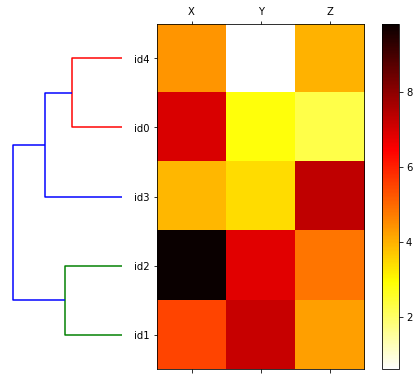

In [10]:
#热度图附加树状图

fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
#对数据按照树状图对象可以访问的聚类标签排序
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
#构建热度图
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [11]:
#创建半月形结构数据集，比较三种聚类算法：k-均值、层次聚类、DBSCAN

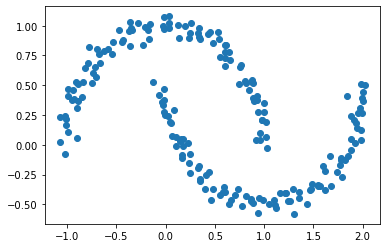

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

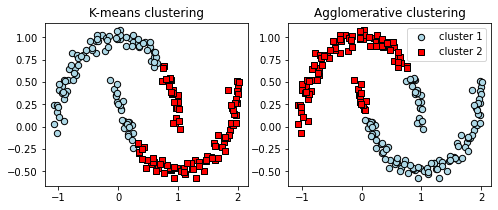

In [15]:
#K-均值和层次聚类
from sklearn.cluster import AgglomerativeClustering
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.show()

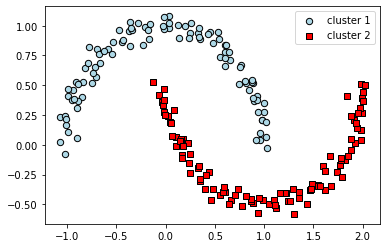

In [17]:
#DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()